#Διακριτός Μετασχηματισμός Fourier

O μετασχηματισμός Fourier χρησιμοποιείται για την ανάλυση των χαρακτηριστικών συχνότητας ενός σήματος. Για τις εικόνες χρησιμοποιείται ο δισδιάστατος διακριτός μετασχηματισμός Fourier 2D (DFT) ο οποίος δίνεται από τη σχέση 

$$F(u,v)=\sum_{x=0}^{M-1}\sum_{y=0}^{N-1} f(x,y)e^{-j2π(ux/M+vy/N)}\;(1)$$ 

όπου $f(x,y)$ είναι μια ψηφιακή εικόνα διαστάσεων ΜxN. H εξίσωση (1) θα πρέπει να υπολογιστεί για τις τιμές των διακριτών μεταβλητών $u$ και $v$ στις περιοχές $u=0,1,2,\cdots,Μ-1$ και $v=0,1,2,\cdots,N-1$.

Εάν γνωρίζουμε το μετασχηματισμό $F(u,v)$, μπορούμε να υπολογίζουμε τη συνάρτηση $f(x,y)$ χρησιμοποιώντας τον αντίστροφο δισδιάστατος διακριτός μετασχηματισμός Fourier 2D (ΙDFT)
$$f(x,y)=\frac{1}{MN} \sum_{u=0}^{M-1}\sum_{v=0}^{N-1} F(u,v)e^{-j2π(ux/M+vy/N)}\;(2)$$ 

για τις τιμές των διακριτών μεταβλητών $x$ και $y$ στις περιοχές $x=0,1,2,\cdots,Μ-1$ και $y=0,1,2,\cdots,N-1$.

Οι εξισώσεις (1) και (2) αποτελούν το ζεύγος των δισδιάστατων μετασχηματισμών Fourier.

## Φάσμα Fourier και γωνία φάσης

Ο μετασχηματισμός Fourier είναι στη γενική περίπτωση μιγαδική ποσότητα, οπότε μπορεί να εκφραστεί σε πολικές συντεταγμένες ως εξής:

$$F(u,v)=|F(u,v)|e^{jφ(u,v)}\;(3)$$ 

με το μέτρο: $|F(u,v)|=[R^2(u,v)+I^2(u,v)]^{1/2}\;(4)$ 
να ονομάζεται *φάσμα Fourier* ή *φάσμα συχνοτήτων*

και την ποσότητα: $φ(u,v)=arctan[\frac{I(u,v)}{R(u,v)}]\;(5)$ 

να ονομάζεται *γωνία φάσης*.

In [1]:
# Import functions and libraries
import numpy as np
from numpy import r_
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy
from scipy import ndimage
from skimage import data, img_as_float
from scipy.fftpack import fft2,fftshift,ifftshift, ifft2
from skimage.io import imread, imshow, show
from skimage.color import rgb2gray



### Δημιουργία μιας δοκιμαστικής εικόνας και εφαρμογή FFT 

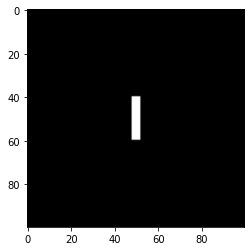

In [2]:
#Αρχική εικόνα
im = np.zeros((100, 100)) # sample 2D array
im[40:60,48:52]=1

# Απεικόνιση
plt.imshow(im, cmap="gray")
plt.show()

# Υπολογισμός μεγέθος εικόνας
imsize = im.shape
height = im.shape[0]
width = im.shape[1]

In [3]:
# Εφαρμογή fft2 σε ολόκληρη την εικόνα
im_fft=fft2(im)

# Υπολογισμός φάσματος και γωνίας φάσης
amplitudeFFT=abs(abs(im_fft))
angleFFT=np.angle(im_fft)

##Ιδιότητες μετασχηματισμού Fourier
### 1. Περιοδικότητα
Ο δισδιάστατος διακριτός μετασχηματισμός Fourier 2D (DFT) και ο αντίστροφός του είναι περιοδικές συναρτήσεις άπειρης διάρκειας κατά τις διευθύνσεις των μεταβλητών $u$ και $v$:

$F(u,v)=F(u+k_{1}M,v)=F(u,v+k_{2}N)=F(u+k_{1}M,v+k_{2}N)$ 

και 

$f(x,y)=f(x+k_{1}M,y)=f(x,y+k_{2}N)=f(x+k_{1}M,y+k_{2}N)$


#![Σχήμα 1](https://drive.google.com/uc?id=1WqES90pr3TbaiIcdx5UBv4OVfHnk6gNR)

O μετασχηματισμό Fourier μπορεί να μετατοπιστεί, με σκοπό να κεντραριστεί, πολλαπλασιάζοντας τη συνάρτηση f(x) με την ποσότητα $(-1)^x$ πριν τον υπολογισμό της συνάρτησης F(u).

![Σχήμα 2](https://drive.google.com/uc?id=1jPaA2lPad06pcVIbuweC9ZrUL6JRljbP)

Ομοίως και ο 2D DFT, η συνεχής γραμμή αποτελεί ένα πίνακα δεδομένων $F(u,v)$, διαστάσεων $MxN$, που προκύπτει από την εξίσωση (1). Η μετατόπιση του προκύπτει πολλαπλασιάζοντας την $f(x,y)$ με την ποσότητα $(-1)^{x+y}$ πριν τον υπολογισμό της $F(u,v)$, μας δίνει μια πλήρη και κεντραρισμένη περίοδο. 



In [4]:
# Κεντράρισμα φάσματος
im_ffts=fftshift(im_fft)

Στην Εικόνα 2 (FFT Μ/Σ στην αρχική εικόνα) απεικονίζεται το φάσμα της Εικόνας 1 (Αρχική εικόνα)
.  

Η αρχή του συστήματος συντεταγμένων τόσο στο πεδίο του χώρου όσο και στο πεδίο των συχνοτήτων είναι η άνω αριστερή γωνία.

Όπως αναμέναμε η περιοχή γύρω από την αρχή του μετασχηματισμού περιέχει τις μεγαλύτερες τιμές. Οι γωνίες του πίνακα φάσματος, λόγω περιοδικότητας,  περιέχουν παρόμοιες υψηλές τιμές (Εικόνα 3. Εστίαση στην πάνω αριστερή γωνία των τιμών του φάσματος του FFT Μ/Σ). 

Προκειμένουν να κεντράρουμε το φάσμα, όπως αναφέραμε, πολλαπλασιάζουμε την $f(x,y)$ με την ποσότητα $(-1)^{x+y}$ πριν τον υπολογισμό της $F(u,v)$. Η συνάρτηση fftshift ουσιαστικά πραγματοποιεί αυτό το κεντράρισμα, εφαρμόζοντας και ένα λογαριθμικό μετασχηματισμό ($1+log|F(u,v)|$) για να εμφανιστεί και η δυναμική των άλλων εντάσεων στην εικόνα μαζί με το συνεχή όρο που κυριαρχεί στο φάσμα (Εικόνα 4. Κεντράρισμα του FFT φάσματος). 



Text(0.5, 1.0, 'Εικ.5.Γωνία φάσης αρχικής εικόνας')

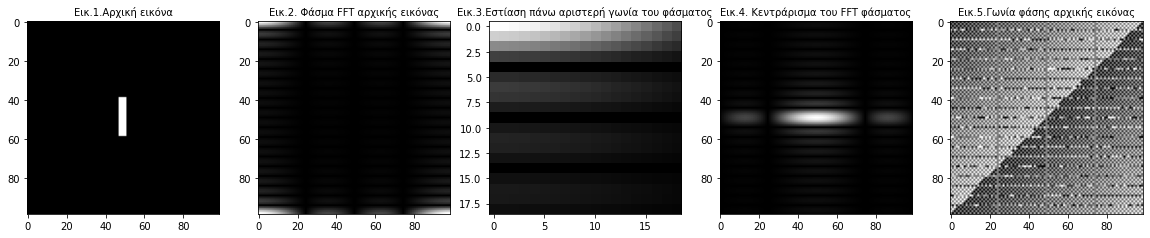

In [5]:
f, (ax0,ax1,ax2,ax3,ax4) = plt.subplots(1, 5, figsize=(20, 10))

ax0.imshow(abs(im[1:height,1:width]),cmap='gray')
ax0.set_title('Εικ.1.Αρχική εικόνα', fontsize=10)

ax1.imshow(amplitudeFFT[1:height,1:width],cmap='gray')
ax1.set_title('Εικ.2. Φάσμα FFT αρχικής εικόνας', fontsize=10)

ax2.imshow(amplitudeFFT[ 1:20,1:20],cmap='gray')
ax2.set_title('Εικ.3.Εστίαση πάνω αριστερή γωνία του φάσματος', fontsize=10)

ax3.imshow(abs(im_ffts[1:height,1:width]),cmap='gray')
ax3.set_title('Εικ.4. Κεντράρισμα του FFT φάσματος', fontsize=10)

ax4.imshow(angleFFT[1:height,1:width],cmap='gray')
ax4.set_title('Εικ.5.Γωνία φάσης αρχικής εικόνας', fontsize=10)


Τα διέλευσης από το μηδέν (zero-crossings) του φάσματος βρίσκονται πιο κοντά προς την κάθετη διεύθυνση, το ορθογώνιο που εμφανίζεται στην Εικ.1 έχει πιο μεγάλο μήκος προς αυτήν την διεύθυνση σε σχέση με την οριζόντια.

### Μετατόπιση εικόνας
Θα μετατοπίσουμε το ορθογώνιο στην εικόνα και θα υπολογίσουμε τον μετασχηματισμό Fourier.

In [6]:
# Μετατοπισμένη εικόνα
imt = np.zeros((100, 100)) # sample 2D array
imt[20:40,68:72]=1

# Υπολογισμός μεγέθους εικόνας
imsizet = imt.shape
heightt = imt.shape[0]
widtht = imt.shape[1]

# Υπολογισμός FFT (φάσμα και γωνία φάσης) 
im_fftt=fft2(imt)
amplitudeFFTΤ=abs(abs(im_fftt))
angleFFTT=np.angle(im_fftt)

#Κεντράρισμα φάσματος
im_fftst=fftshift(im_fftt)

Text(0.5, 1.0, 'Εικ.10. Γωνία φάσης μετατόπισης')

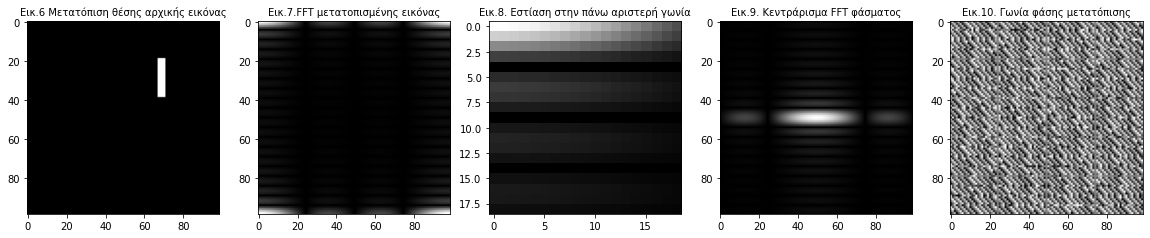

In [7]:
# Απεικόνιση εικόνων

f, (ax0,ax1,ax2,ax3,ax4) = plt.subplots(1, 5, figsize=(20, 10))

ax0.imshow(imt[1:height,1:width],cmap='gray')
ax0.set_title('Εικ.6 Μετατόπιση θέσης αρχικής εικόνας', fontsize=10)

ax1.imshow(amplitudeFFTΤ[1:height,1:width],cmap='gray')
ax1.set_title('Εικ.7.FFT μετατοπισμένης εικόνας', fontsize=10)

ax2.imshow(amplitudeFFTΤ[1:20,1:20],cmap='gray')
ax2.set_title('Εικ.8. Εστίαση στην πάνω αριστερή γωνία', fontsize=10)

ax3.imshow(abs(im_fftst[1:height,1:width]),cmap='gray')
ax3.set_title('Εικ.9. Κεντράρισμα FFT φάσματος', fontsize=10)

ax4.imshow(angleFFTT[1:height,1:width],cmap='gray')
ax4.set_title('Εικ.10. Γωνία φάσης μετατόπισης', fontsize=10)


Παρατηρούμε ότι κατά τη μετατόπιση της εικόνας, το φάσμα δεν μεταβάλλεται (αφού η απόλυτη τιμή του εκθετικού όρου είναι ίση με τη μονάδα - Εικόνα 4 και Εικόνα 9).  Επειδή οι Εικόνες 1 και 6 είναι διαφορετικές μεταξύ τους και τα φάσματά τους είναι ίδια, τότε (σύμφωνα με την εξίσωση 3) οι γωνίες φάσης τους θα πρέπει να είναι διαφορετικές. Πράγματι, κάτι τέτοιο ισχύει (Εικόνα 5 και Εικόνα 10).


Έπειτα, θα περιστρέψουμε την αρχική εικόνα κατά 45 μοίρες, θα εφαρμόσουμε τον FFT μετασχηματισμό, θα κεντράρουμε τις τιμές του φάσματος και θα τα απεικονίσουμε, όπως πριν.

In [8]:
# Περιστροφή εικόνας
im_45 = ndimage.rotate(im, 45, reshape=False)

# Υπολογισμός FFT (φάσμα και γωνία φάσης) 
im_fft45=fft2(im_45)
amplitudeFFT45=abs(abs(im_fft45))
angleFFT45=np.angle(im_fft45)

# Κεντράρισμα φάσματος
im_ffts45=fftshift(im_fft45)

Text(0.5, 1.0, 'Εικ.15. Γωνία φάσης')

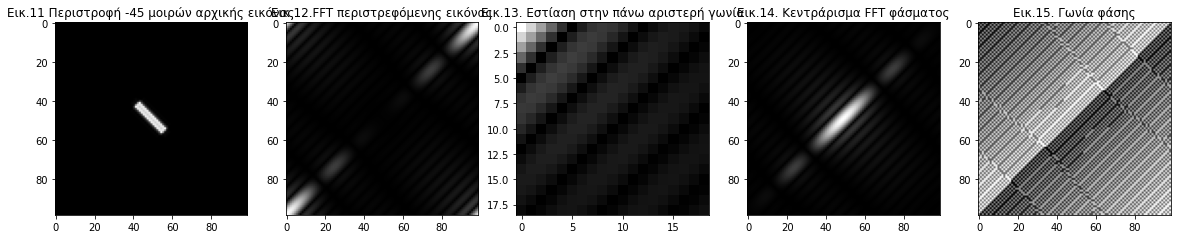

In [9]:
#Απεικονίσεις
f, (ax0,ax1,ax2,ax3,ax4) = plt.subplots(1, 5, figsize=(20, 10))

ax0.imshow(abs(im_45[1:height,1:width]),cmap='gray')
ax0.set_title('Εικ.11 Περιστροφή -45 μοιρών αρχικής εικόνας', fontsize=12)

ax1.imshow(amplitudeFFT45[1:height,1:width],cmap='gray')
ax1.set_title('Εικ.12.FFT περιστρεφόμενης εικόνας', fontsize=12)

ax2.imshow(amplitudeFFT45[1:20,1:20],cmap='gray')
ax2.set_title('Εικ.13. Εστίαση στην πάνω αριστερή γωνία', fontsize=12)

ax3.imshow(abs(im_ffts45[1:height,1:width]),cmap='gray')
ax3.set_title('Εικ.14. Κεντράρισμα FFT φάσματος', fontsize=12)

ax4.imshow(angleFFT45[1:height,1:width],cmap='gray')
ax4.set_title('Εικ.15. Γωνία φάσης', fontsize=12)

Αν η αρχική εικόνα υποστεί περιστροφή π.χ. 45 μοιρών παρατηρούμε ότι το φάσμα της (Εικόνα 14) περιστρέφεται κατά την ίδια γωνία (σε σχέση με την Εικόνα 4).

Κοιτάζοντας το DFT ή το φάσµα µιας εικόνας (απεικόνιση του µέτρου
του DFT της εικόνας), µπορούµε να προσδιορίσουµε πολλά στοιχεία
σχετικά µε την εικόνα:
* Οι φωτεινές περιοχές στην DFT “εικόνα” αντιστοιχούν στις συχνότητες οι
οποίες έχουν µεγάλο µέτρο (ισχύ) στην πραγµατική εικόνα.
* Μεγάλες τιµές κοντά στο κέντρο του (µετατοπισµένου) DFT αντιστοιχούν
σε µεγάλες οµαλές περιοχές της εικόνας ή σε ισχυρά φωτεινό φόντο.

##2. Συμμετρία
Κάθε μιγαδική συνάρτηση μπορεί να εκφραστεί ως το άθροισμα μίας άρτιας(συμμετρική) και μίας περιττής (αντισυμμετρική) συνιστώσας.

> ![Σχήμα 3](https://drive.google.com/uc?id=1UsnNYOhHvEnBsprAaglaUMiip180cnoW)

Ο μετασχηματισμός Fourier μιας πραγματικής συνάρτησης είναι συζυγώς συμμετρικός (Σχέση 1 του παραπάνω πίνακα), κάτι που υπονοεί ότι το φάσμα θα χαρακτηρίζεται από άρτια συμμετρία ως προς την αρχή των αξόνων, οπότε $F(0,0)=\sum_{x=0}^{M-1}\sum_{y=0}^{N-1}f(x,y)$.

Από την εξίσωση (3) προκύπτει το συμπέρασμα πως ο όρος που αντιστοιχεί στη μηδενική συχνότητα είναι ανάλογος της μέσης τιμής της συνάρτησης $f(x,y)$ : $F(0,0)=ΜΝ|\overline{f}(x,y)|$.

Επειδή η σταθερά αναλογίας $ΜΝ$ έχει μεγάλη τιμή, η $|F(0,0)|$ αποτελεί, στις πιο πολλές περιπτώσεις, τη μεγαλύτερη συνιστώσα του φάσματος (αρκετές τάξεις μεγέθους σε σχέση με τους υπόλοιπους όρους). 

Επειδή οι συνιστώσες συχνότητας u,v είναι μηδέν στην αρχή του συστήματος συντεταγμένων, η $F(0,0)$ ονομάζεται **dc συνιστώσα** του μετασχηματισμού.


In [10]:
from scipy.fftpack import fft2,fftshift,ifftshift, ifft2
from scipy import ndimage

im=data.camera()

# Υπολογισμός FFT 
imfft=fft2(im)

#Κεντράρισμα φάσματος
im_fftsh=fftshift(imfft)

# Αντίστροφος μετασχηματισμός FFT
imifftsh=ifftshift(im_fftsh)
im_ifft=abs(ifft2(imifftsh))

Text(0.5, 1.0, 'Εικ.20.Αντίστροφος μετασχηματισμός FFT')

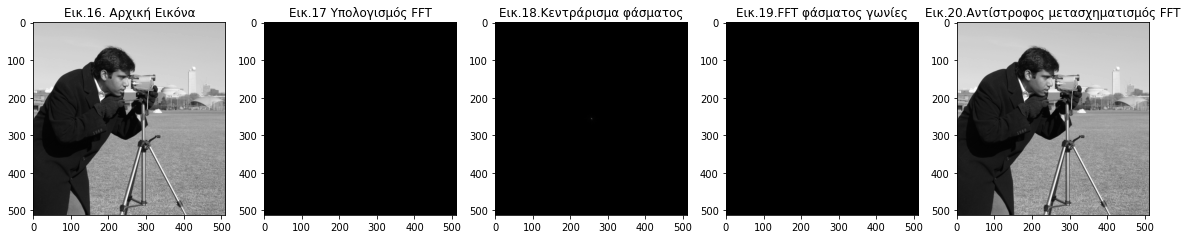

In [11]:
#Απεικονίσεις
f, (ax0,ax1,ax2,ax3,ax4) = plt.subplots(1, 5, figsize=(20, 10))

ax0.imshow(im,cmap='gray')
ax0.set_title('Εικ.16. Αρχική Εικόνα', fontsize=12)

ax1.imshow(abs(imfft),cmap='gray')
ax1.set_title('Εικ.17 Υπολογισμός FFT', fontsize=12)

ax2.imshow(abs(im_fftsh),cmap='gray')
ax2.set_title('Εικ.18.Κεντράρισμα φάσματος', fontsize=12)

ax3.imshow(abs(imifftsh),cmap='gray')
ax3.set_title('Εικ.19.FFT φάσματος γωνίες', fontsize=12)

ax4.imshow(abs(im_ifft),cmap='gray')
ax4.set_title('Εικ.20.Αντίστροφος μετασχηματισμός FFT', fontsize=12)



## Ιδιότητες μετασχηματισμού FFT σε πραγματικές εικόνες

Μεταβείτε στην <a href="https://drive.google.com/file/d/1YWp-cMJ1uvZATocIiQcD4DDqM1KSpNES/view?usp=sharing">Άσκηση 1</a> 



###Βιβλιογραφία                                                                   
Κεφάλαιο 4. Φιλτράρισμα στο πεδίο των συχνοτήτων,  

Ψηφιακή Επεξεργασία Εικόνας,

Συγγραφείς R.Gonzalez & R.Woods, Επιμέλεια μετάφρασης: Σ. Κόλλιας, 

Εκδόσεις Τζιόλας, 4η Έκδοση